# **Finding the Lane Lines**

## **Imports**

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **Historgram**

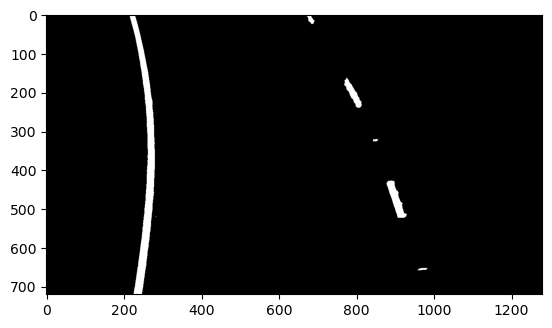

In [39]:
img = cv2.imread('book_images/threshold.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

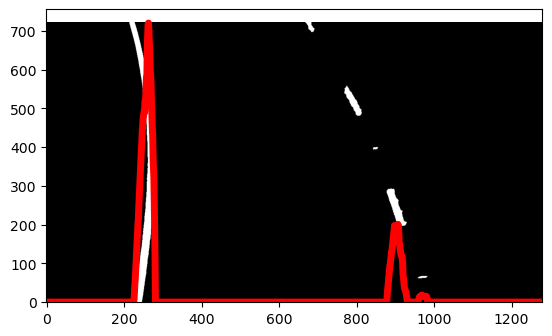

In [40]:
hist = np.sum(img[img.shape[0] // 2:, :], axis=0)

hist_scaled = hist.astype('float32')
hist_scaled *= (img.shape[0]) / hist.max()

implot = plt.imshow(np.flipud(img), origin='lower', cmap='gray')
plt.plot(hist_scaled, linewidth=5, color='red')
plt.show()

In [41]:
def find_pixels(center, margin, window_height, non_zero_x, non_zero_y):
    
    # Define top-left and bottom-right x and y coords for window boundry
    top_left = (center[0] - margin, center[1] - (window_height // 2))
    bottom_right = (center[0] + margin, center[1] + window_height // 2)
    
    # Create conditions for array indexing
    cond_x = (non_zero_x >= top_left[0]) & (non_zero_x <= bottom_right[0])
    cond_y = (non_zero_y >= top_left[1]) & (non_zero_y <= bottom_right[1])

    # Index non-zero array to only take pixels within the window boundries
    targets_x = non_zero_x[cond_x & cond_y]
    targets_y = non_zero_y[cond_x & cond_y]

    # print(top_left, bottom_right)
    # print(len(targets_x), len(targets_y))

    return targets_x, targets_y

In [42]:
# Create historgram
hist = np.sum(img[img.shape[0] // 2:, :], axis=0)

# Define midpoint of historgram
midpoint = int(hist.shape[0] / 2)

# Define base location of left and right lines based on the peak
# of the histograms to the left and right of the midpoint
left_x_base = np.argmax(hist[:midpoint])
right_x_base = np.argmax(hist[midpoint:]) + midpoint

# Define the number of sliding windows and window height
n_windows = 9
window_height = int(img.shape[0] // n_windows)

# Define margin for window width
margin = 100

# Create pointers for lane center x locations
left_x_curr = left_x_base
right_x_curr = right_x_base

# Create pointer for y locations of center of first window
y_curr = img.shape[0] - window_height // 2

# Create empty lists to store lane line pixel locations
left_x, left_y, right_x, right_y = [], [], [], []

# Get x and y poisitions of all non-zero pixels in image
non_zero = img.nonzero()
non_zero_x = np.array(non_zero[1])
non_zero_y = np.array(non_zero[0])

# Define minimum number of pixels detected to shift window
min_pixels = 50



# Start sliding window
for _ in range(n_windows):
    # Define center coords of left and right windows
    print(left_x_curr, right_x_curr, y_curr)
    center_left = (left_x_curr, y_curr)
    center_right = (right_x_curr, y_curr)

    # Get x and y coords of pixels that fall within the window
    left_window_x, left_window_y = find_pixels(center_left, margin, window_height, non_zero_x, non_zero_y)
    right_window_x, right_window_y = find_pixels(center_right, margin, window_height, non_zero_x, non_zero_y)

    # Add pixels detected in window to master lists
    left_x.extend(left_window_x)
    left_y.extend(left_window_y)
    right_x.extend(right_window_x)
    right_y.extend(right_window_y)

    # Update pointers
    if len(left_window_x) >= min_pixels:
        left_x_curr = np.int32(np.mean(left_window_x))
    if len(right_window_x) >= min_pixels:
        right_x_curr = np.int32(np.mean(right_window_x))
    y_curr -= window_height

263 907 680
242 971 600
253 971 520
262 911 440
268 895 360
270 849 280
268 849 200
261 791 120
249 791 40


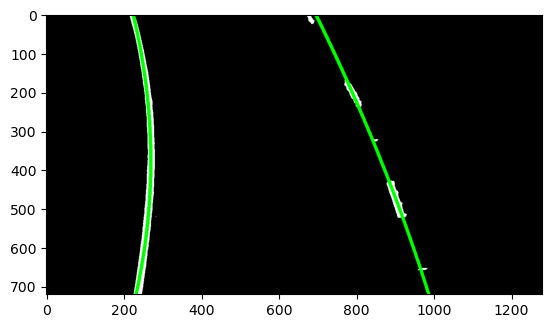

In [43]:
out_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# out_img = np.zeros((img.shape[0], img.shape[1], 3))

left_fit = np.polyfit(left_y, left_x, 2)
right_fit = np.polyfit(right_y, right_x, 2)

draw_x = np.linspace(0, img.shape[1], img.shape[1])

draw_y_left = np.polyval(left_fit, draw_x)
draw_y_right = np.polyval(right_fit, draw_x)

draw_points_left = (np.asarray([draw_y_left, draw_x]).T).astype(np.int32)
draw_points_right = (np.asarray([draw_y_right, draw_x]).T).astype(np.int32)

draw = cv2.polylines(out_img, [draw_points_left], False, (0, 255, 0), thickness=8)
draw = cv2.polylines(out_img, [draw_points_right], False, (0, 255, 0), thickness=8)
draw = draw.astype(np.int32)
plt.imshow(draw)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


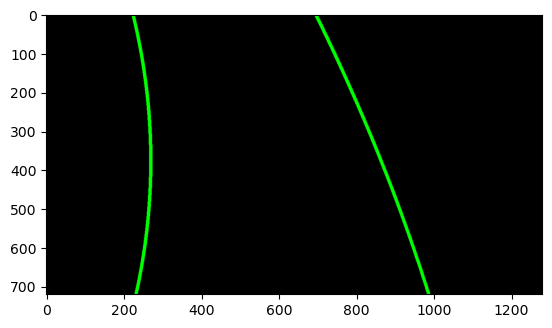

In [48]:
out_img = np.zeros((img.shape[0], img.shape[1], 3))

draw = cv2.polylines(out_img, [draw_points_left], False, (0, 255, 0), thickness=8)
draw = cv2.polylines(out_img, [draw_points_right], False, (0, 255, 0), thickness=8)
# draw = draw.astype(np.int32)

cv2.imwrite('book_images/lines.png', draw)
plt.imshow(out_img)